In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
from dataload import *
from model import *
from research import *
from helper_functions import *

DATA

In [3]:
calculer = True

In [4]:
if calculer == False:
  dataframe = pd.read_csv('../data/Pays-Bas/Eredevisie/N1_fullDataWithNotes.csv')
else:
  dataframe = pd.read_csv('../data/Pays-Bas/Eredevisie/N1 10:11.csv')
  for i in range(10, 23):
    d2 = pd.read_csv(f"../data/Pays-Bas/Eredevisie/N1 {i}:{i + 1}.csv")
    dataframe = pd.concat([dataframe, d2])
  dataframe = arrange_data(dataframe, 'FTHG', 'FTAG', 'HA_Scored')

print(f"{dataframe.tail(20).to_string()}\n")

            Date          HomeTeam          AwayTeam  FTHG  FTAG  HA_Scored
4073  29/01/2023           Cambuur       For Sittard     1     2          1
4074  01/02/2023          Waalwijk   Go Ahead Eagles     3     1          1
4075  03/02/2023       For Sittard  Sparta Rotterdam     0     0          0
4076  04/02/2023          Volendam        AZ Alkmaar     1     1          1
4077  04/02/2023          FC Emmen           Vitesse     2     2          1
4078  04/02/2023           Utrecht        Heerenveen     1     0          0
4079  04/02/2023         Excelsior          Waalwijk     0     0          0
4080  05/02/2023           Cambuur              Ajax     0     5          0
4081  05/02/2023         Feyenoord     PSV Eindhoven     2     2          1
4082  05/02/2023   Go Ahead Eagles          Nijmegen     1     0          0
4083  05/02/2023         Groningen            Twente     1     1          1
4084  10/02/2023        AZ Alkmaar         Excelsior     5     0          0
4085  11/02/

In [5]:
if calculer != False:
    arrayEquipes = get_equipes(dataframe, 0, 18, 'HomeTeam', 'AwayTeam')
    print_array_equipes(arrayEquipes)

0 - Twente
1 - Volendam
2 - Ajax
3 - Waalwijk
4 - Vitesse
5 - Utrecht
6 - Heerenveen
7 - Feyenoord
8 - Sparta Rotterdam
9 - Go Ahead Eagles
10 - FC Emmen
11 - For Sittard
12 - PSV Eindhoven
13 - Groningen
14 - Nijmegen
15 - Cambuur
16 - AZ Alkmaar
17 - Excelsior


In [6]:
"""
    add_match(dataframe, '16/02/2023', arrayEquipes[3], arrayEquipes[11])
    add_match(dataframe, '16/02/2023', arrayEquipes[1], arrayEquipes[4])
    add_match(dataframe, '16/02/2023', arrayEquipes[13], arrayEquipes[10])
    add_match(dataframe, '16/02/2023', arrayEquipes[7], arrayEquipes[16])
    add_match(dataframe, '16/02/2023', arrayEquipes[15], arrayEquipes[6])
    add_match(dataframe, '16/02/2023', arrayEquipes[9], arrayEquipes[0])
    add_match(dataframe, '16/02/2023', arrayEquipes[5], arrayEquipes[12])
    add_match(dataframe, '16/02/2023', arrayEquipes[2], arrayEquipes[8])
    add_match(dataframe, '16/02/2023', arrayEquipes[17], arrayEquipes[14])
"""

"\n    add_match(dataframe, '16/02/2023', arrayEquipes[3], arrayEquipes[11])\n    add_match(dataframe, '16/02/2023', arrayEquipes[1], arrayEquipes[4])\n    add_match(dataframe, '16/02/2023', arrayEquipes[13], arrayEquipes[10])\n    add_match(dataframe, '16/02/2023', arrayEquipes[7], arrayEquipes[16])\n    add_match(dataframe, '16/02/2023', arrayEquipes[15], arrayEquipes[6])\n    add_match(dataframe, '16/02/2023', arrayEquipes[9], arrayEquipes[0])\n    add_match(dataframe, '16/02/2023', arrayEquipes[5], arrayEquipes[12])\n    add_match(dataframe, '16/02/2023', arrayEquipes[2], arrayEquipes[8])\n    add_match(dataframe, '16/02/2023', arrayEquipes[17], arrayEquipes[14])\n"

In [7]:
#display(dataframe.dtypes)

MODÈLE

In [8]:
if calculer != False:
    dataframe['Note'] = ''
    dataframe = get_notes(dataframe, 'HomeTeam', 'AwayTeam', 'Date', 'Note', 'HA_Scored', 1)

0 - 0.0
1 - 0.0
2 - 0.0
3 - 0.0
4 - 0.0
5 - 0.0
6 - 0.0
7 - 0.0
8 - 0.0
9 - 0.0
10 - 0.0
11 - 0.0
12 - 0.0
13 - 0.0
14 - 0.0
15 - 0.0
16 - 0.0
17 - 0.0
18 - 0.11238553113553114
19 - 0.11238553113553114
20 - 0.05619276556776557
21 - 0.11238553113553114
22 - 0.05619276556776557
23 - 0.05619276556776557
24 - 0.05619276556776557
25 - 0.05619276556776557
26 - 0.05619276556776557
27 - 0.11238553113553114
28 - 0.05619276556776557
29 - 0.0
30 - 0.0
31 - 0.05619276556776557
32 - 0.11238553113553114
33 - 0.11238553113553114
34 - 0.05619276556776557
35 - 0.05619276556776557
36 - 0.04671988486130399
37 - 0.162263042898989
38 - 0.16857829670329672
39 - 0.162263042898989
40 - 0.16857829670329672
41 - 0.05303513866561171
42 - 0.16857829670329672
43 - 0.16542066980114287
44 - 0.16542066980114287
45 - 0.05303513866561171
46 - 0.15928285178509832
47 - 0.16542066980114287
48 - 0.162263042898989
49 - 0.10291265042906955
50 - 0.10922790423337728
51 - 0.16857829670329672
52 - 0.16857829670329672
53 - 0.0498

In [9]:
if calculer != False:
    print(f"{dataframe.tail(20).to_string()}\n")

            Date          HomeTeam          AwayTeam  FTHG  FTAG  HA_Scored      Note
4073  29/01/2023           Cambuur       For Sittard     1     2          1  0.349784
4074  01/02/2023          Waalwijk   Go Ahead Eagles     3     1          1  0.345087
4075  03/02/2023       For Sittard  Sparta Rotterdam     0     0          0   0.14706
4076  04/02/2023          Volendam        AZ Alkmaar     1     1          1  0.381222
4077  04/02/2023          FC Emmen           Vitesse     2     2          1  0.300822
4078  04/02/2023           Utrecht        Heerenveen     1     0          0  0.218826
4079  04/02/2023         Excelsior          Waalwijk     0     0          0  0.290903
4080  05/02/2023           Cambuur              Ajax     0     5          0   0.42638
4081  05/02/2023         Feyenoord     PSV Eindhoven     2     2          1  0.391616
4082  05/02/2023   Go Ahead Eagles          Nijmegen     1     0          0  0.272026
4083  05/02/2023         Groningen            Twente  

In [10]:
if calculer != False:
    dtcsv = dataframe.to_csv(index=None)
    fichier = open("../data/Pays-Bas/Eredevisie/N1_fullDataWithNotes.csv", "w")
    fichier.write(dtcsv)
    fichier.close()
    print(dtcsv)

Date,HomeTeam,AwayTeam,FTHG,FTAG,HA_Scored,Note
06/08/10,Roda,Twente,0,0,0,0.0
07/08/10,Graafschap,Excelsior,3,0,0,0.0
07/08/10,Heerenveen,PSV Eindhoven,1,3,1,0.0
07/08/10,Heracles,Willem II,3,0,0,0.0
07/08/10,Nijmegen,VVV Venlo,1,0,0,0.0
08/08/10,Feyenoord,Utrecht,3,1,1,0.0
08/08/10,Groningen,Ajax,2,2,1,0.0
08/08/10,NAC Breda,AZ Alkmaar,1,1,1,0.0
08/08/10,Vitesse,Den Haag,3,1,1,0.0
14/08/10,Ajax,Vitesse,4,2,1,0.0
14/08/10,AZ Alkmaar,Groningen,1,1,1,0.0
14/08/10,PSV Eindhoven,Graafschap,6,0,0,0.0
14/08/10,Twente,Heerenveen,0,0,0,0.0
14/08/10,VVV Venlo,Heracles,1,0,0,0.0
15/08/10,Den Haag,Roda,1,3,1,0.0
15/08/10,Excelsior,Feyenoord,3,2,1,0.0
15/08/10,Utrecht,NAC Breda,3,1,1,0.0
15/08/10,Willem II,Nijmegen,3,5,1,0.0
20/08/10,Excelsior,Nijmegen,4,2,1,0.11238553113553114
21/08/10,Ajax,Roda,3,0,0,0.11238553113553114
21/08/10,Groningen,Graafschap,2,1,1,0.05619276556776557
21/08/10,Heerenveen,NAC Breda,3,1,1,0.11238553113553114
21/08/10,Vitesse,Twente,0,3,0,0.05619276556776557
22/08/10,Heracl

RECHERCHE

In [11]:
lenMatchGroups = 29
data = get_data(dataframe, 'HA_Scored', 'Date', 'Note', lenMatchGroups, 20, 100, 1.4, 1, 42, 43, 1)

Note : 0.2
42% à chaque pari
[0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0]
Sous-résultat : 14/29, 48.27% de réussite
[1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1]
Sous-résultat : 16/29, 55.17% de réussite
[1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1]
Sous-résultat : 19/29, 65.51% de réussite
[1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1]
Sous-résultat : 17/29, 58.62% de réussite
[0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0]
Sous-résultat : 18/29, 62.06% de réussite
[1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0]
Sous-résultat : 16/29, 55.17% de réussite
[1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1]
Sous-résultat : 24/29, 82.75% de réussite
[0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 

80
Note : 0.2


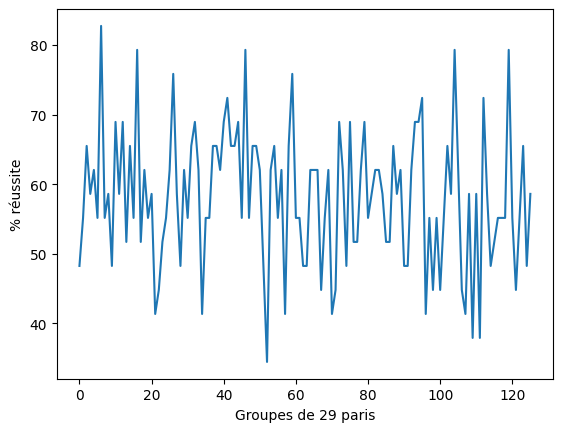

Note : 0.21


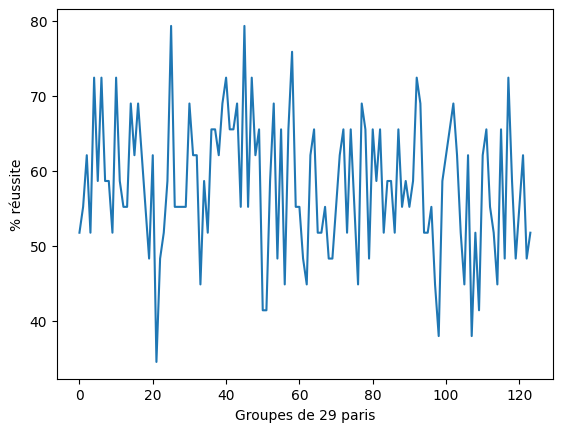

Note : 0.22


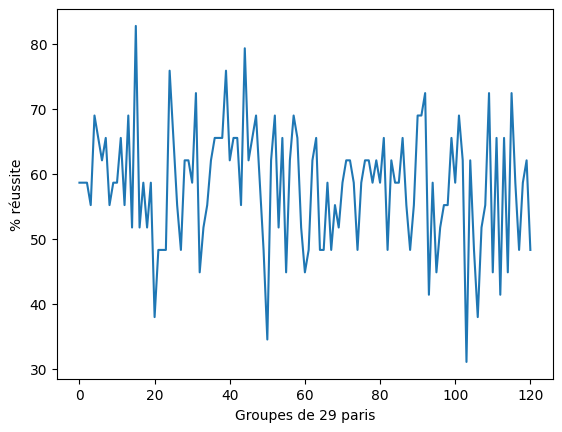

Note : 0.23


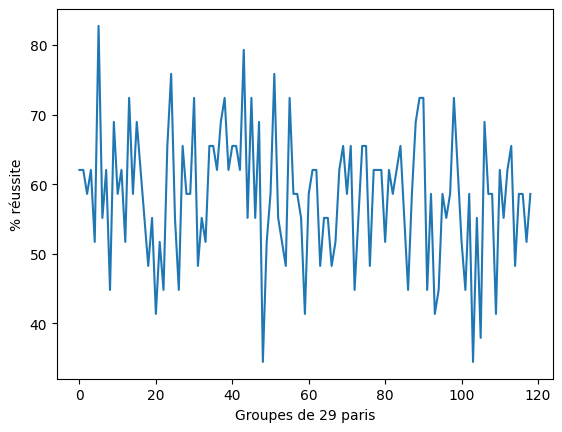

Note : 0.24


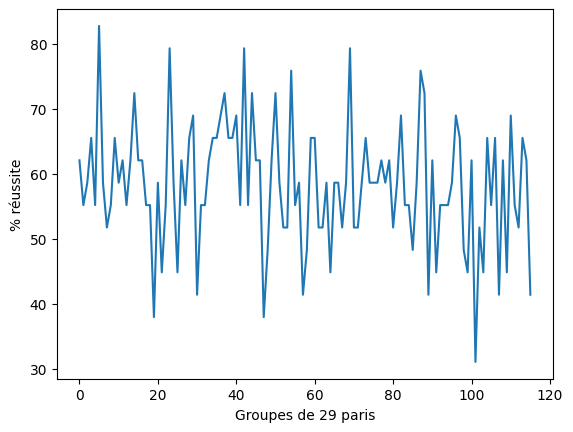

Note : 0.25


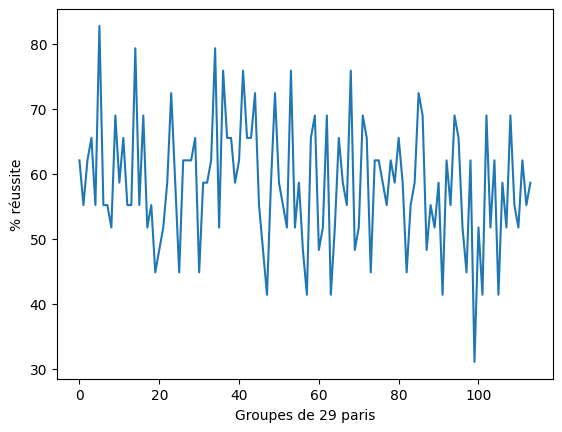

Note : 0.26


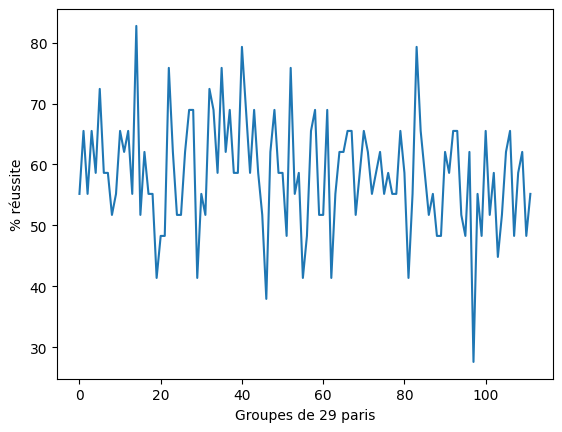

Note : 0.27


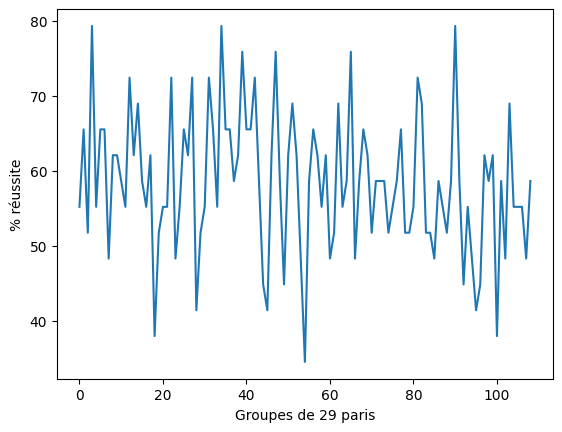

Note : 0.28


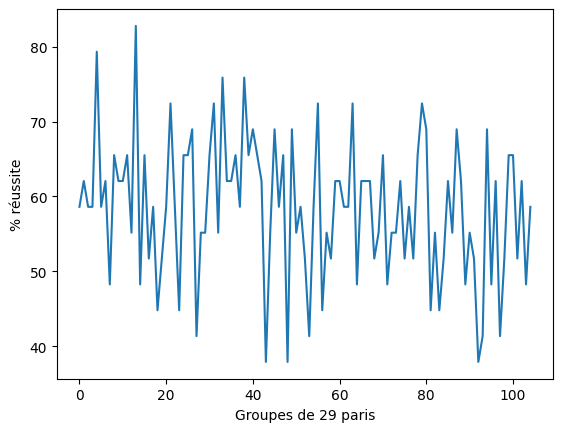

Note : 0.29


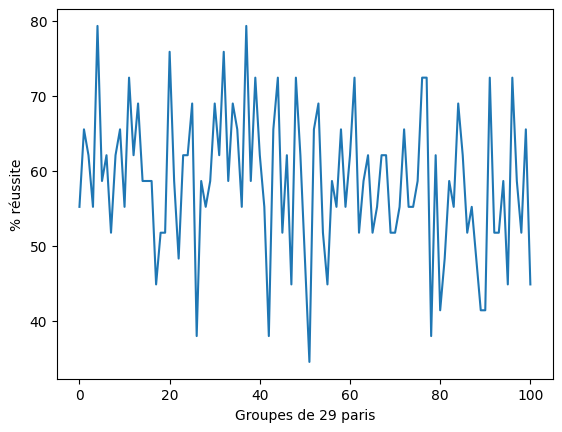

Note : 0.3


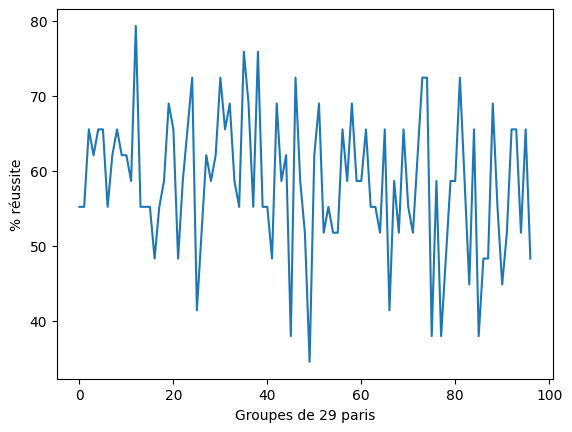

Note : 0.31


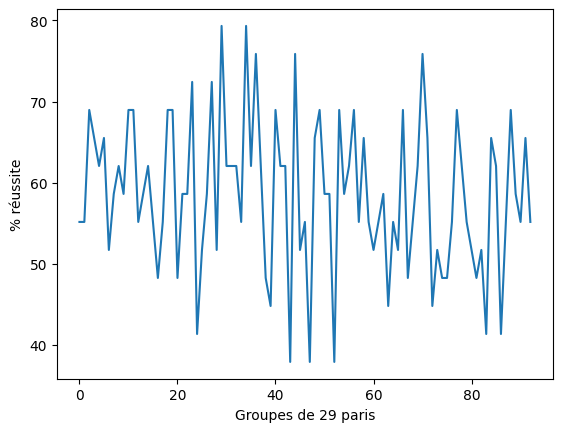

Note : 0.32


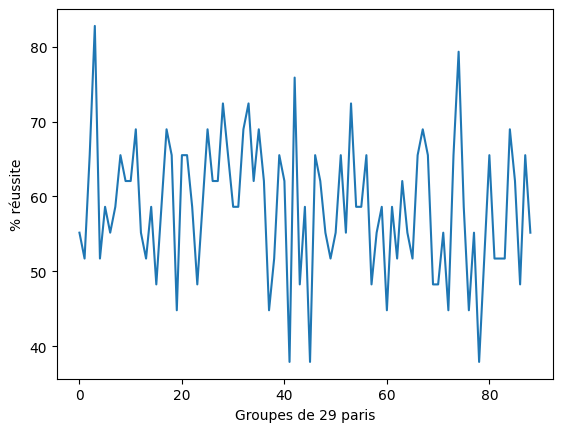

Note : 0.33


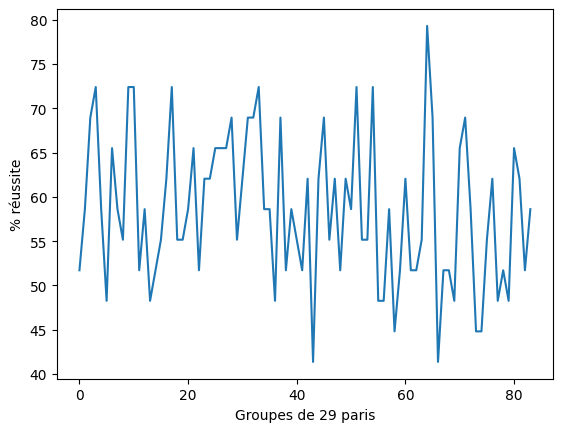

Note : 0.34


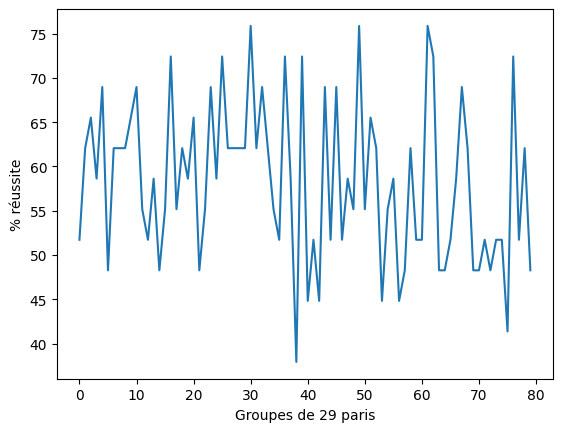

Note : 0.35


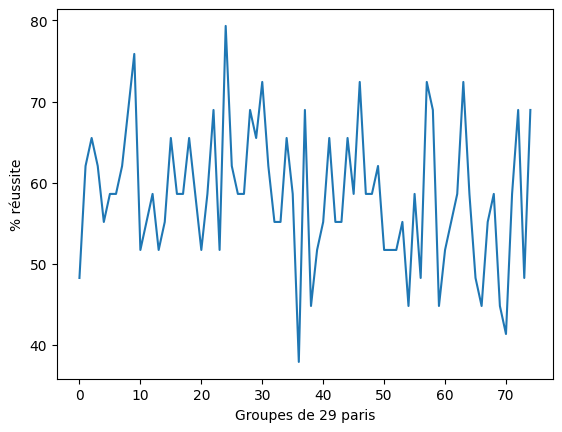

Note : 0.36


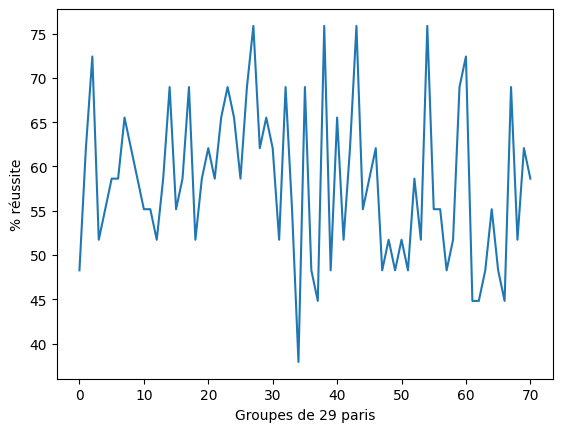

Note : 0.37


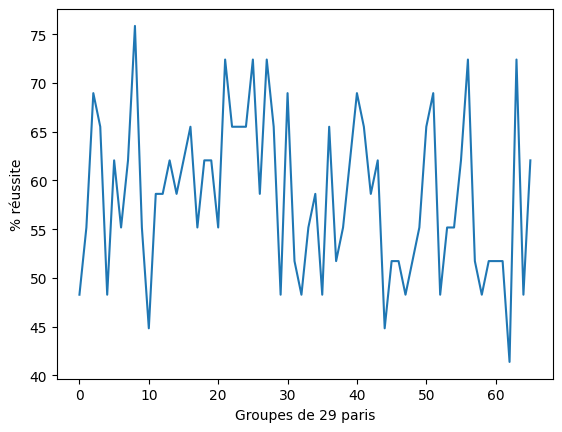

Note : 0.38


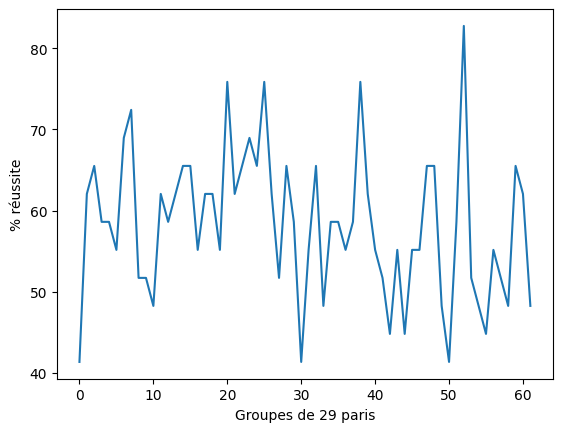

Note : 0.39


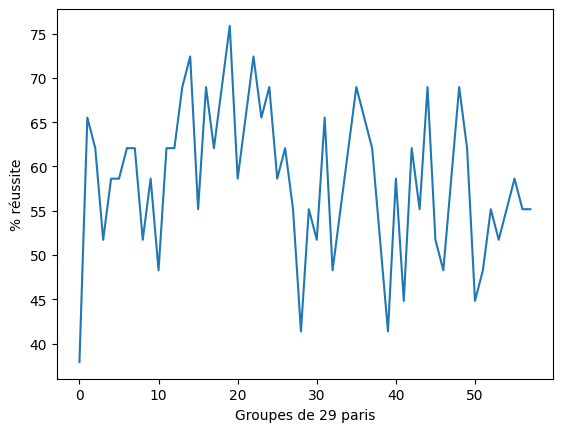

Note : 0.4


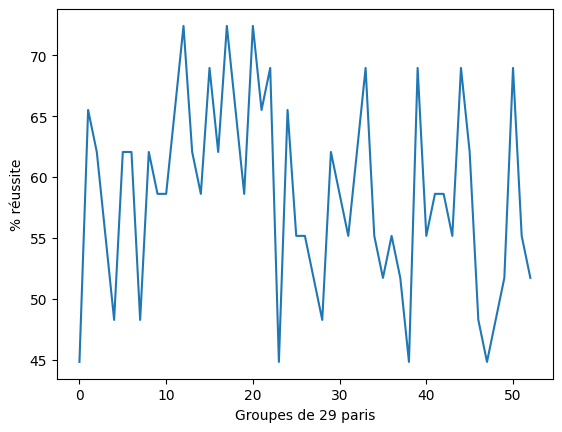

Note : 0.41


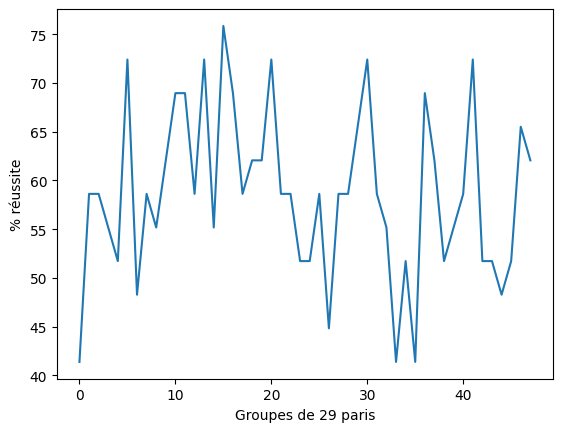

Note : 0.42


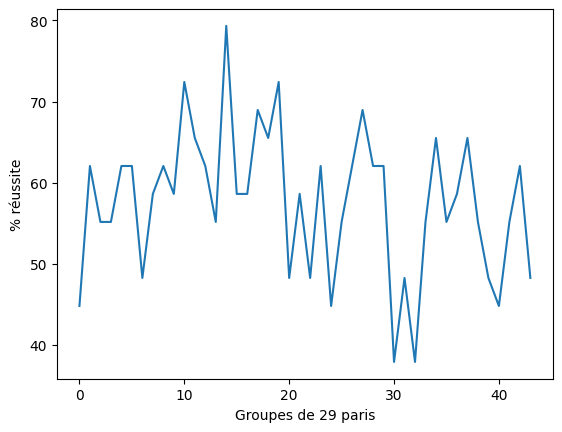

Note : 0.43


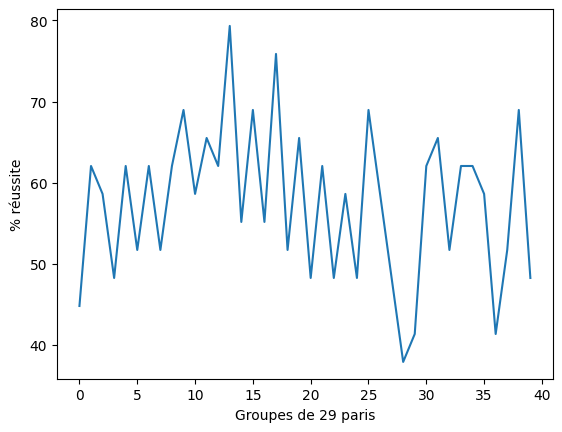

Note : 0.44


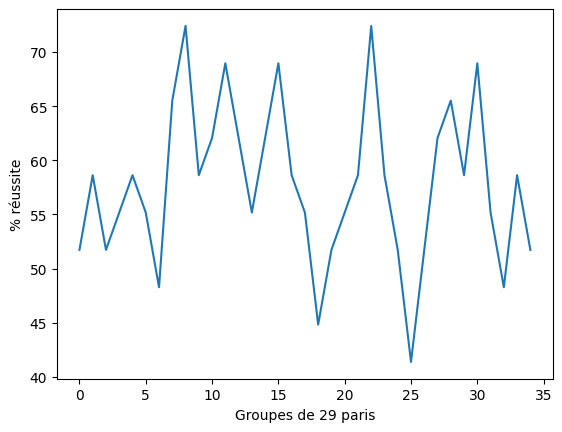

Note : 0.45


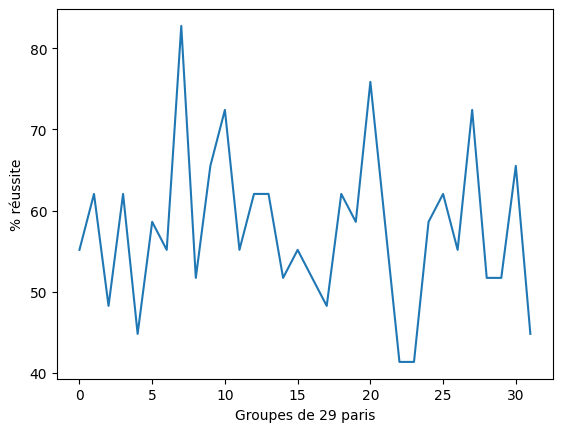

Note : 0.46


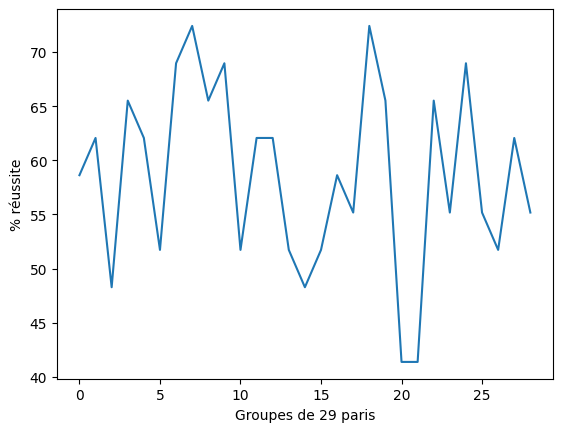

Note : 0.47


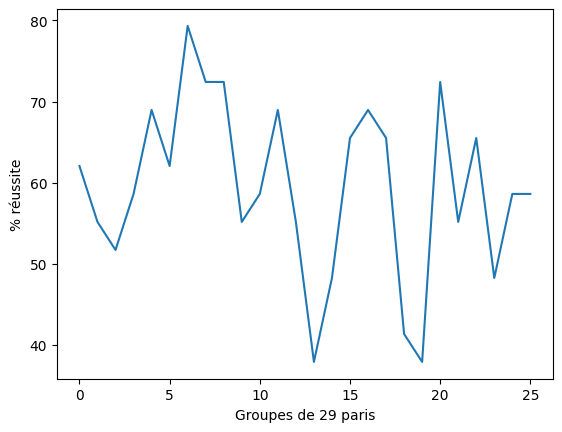

Note : 0.48


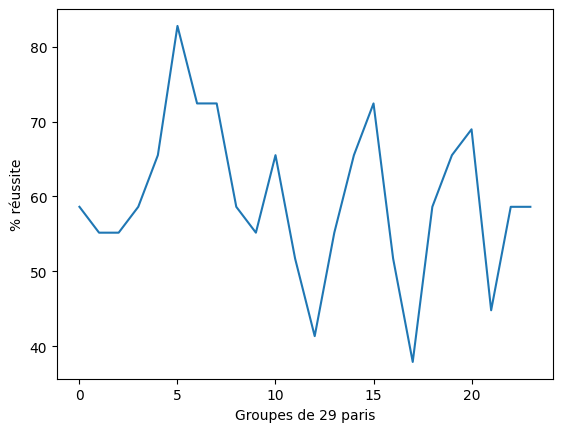

Note : 0.49


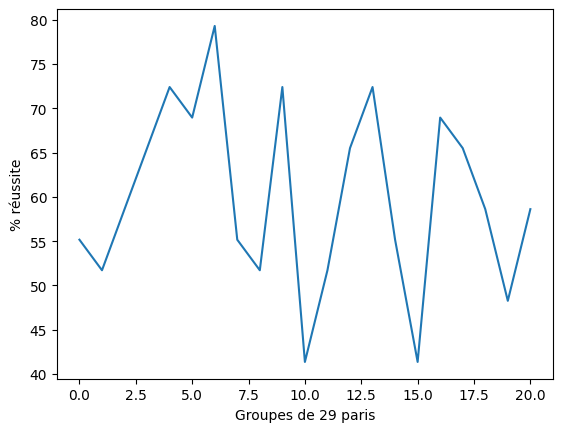

Note : 0.5


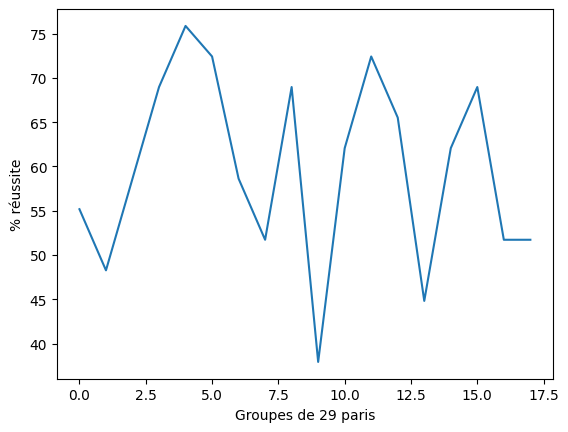

Note : 0.51


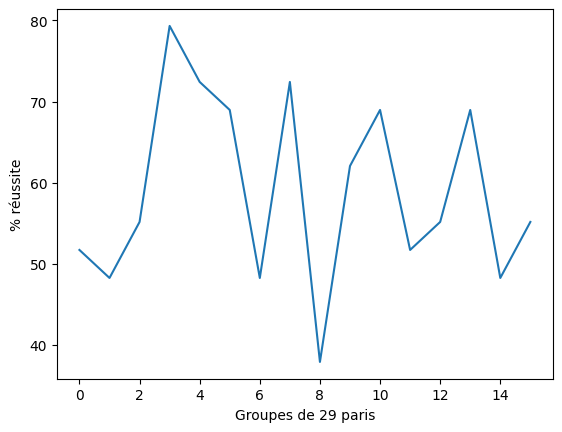

Note : 0.52


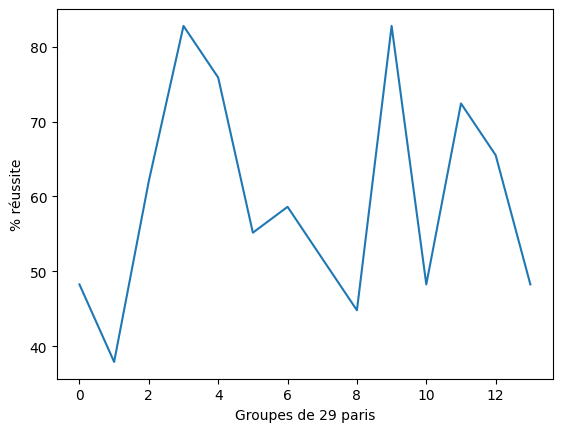

Note : 0.53


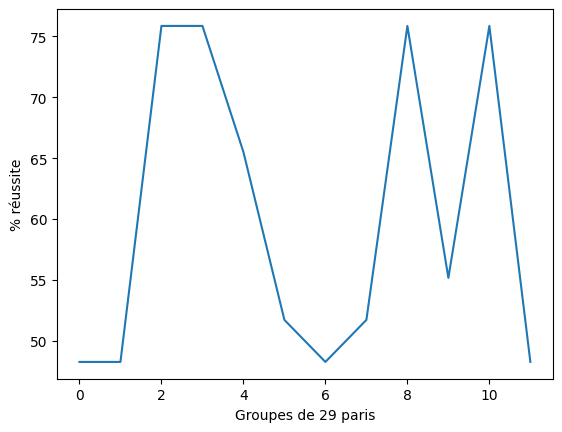

Note : 0.54


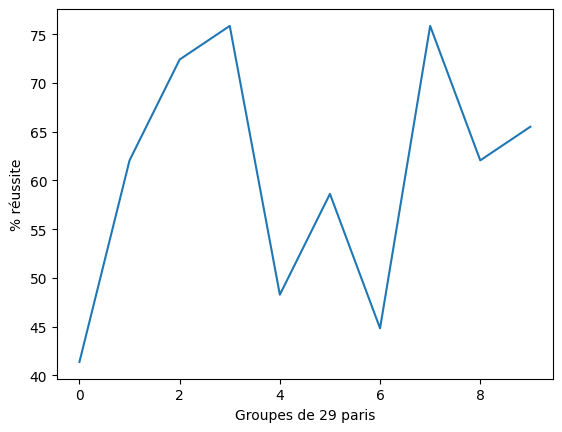

Note : 0.55


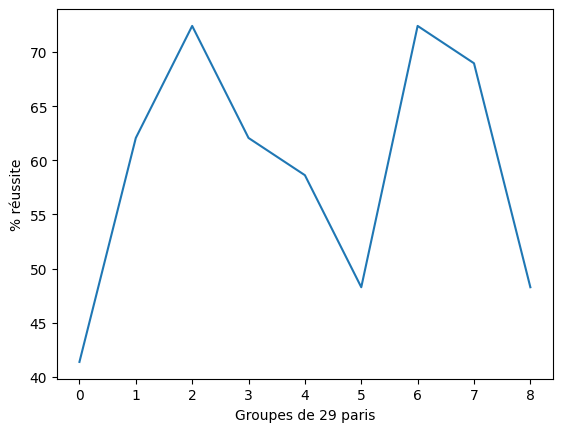

Note : 0.56


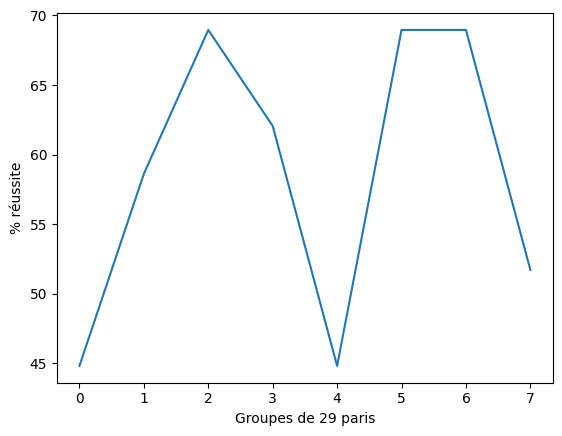

Note : 0.57


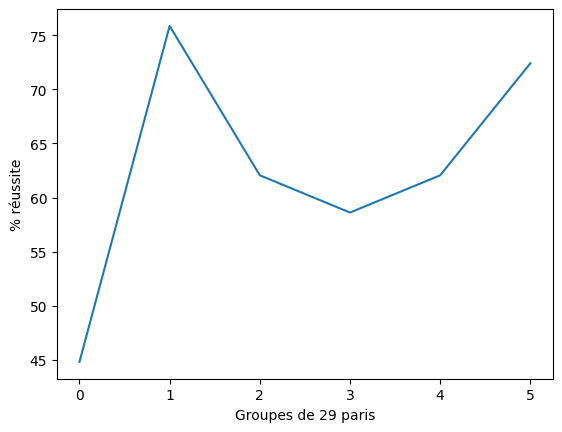

Note : 0.58


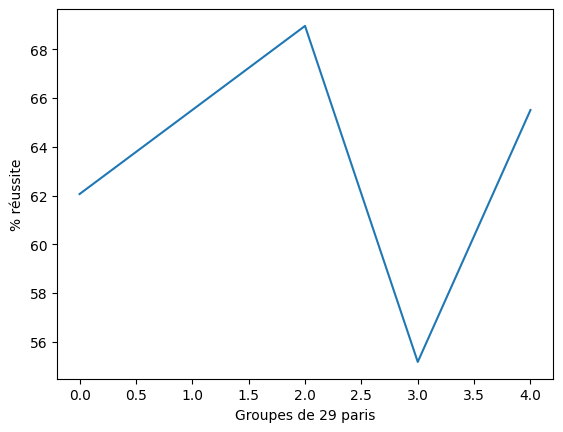

Note : 0.59


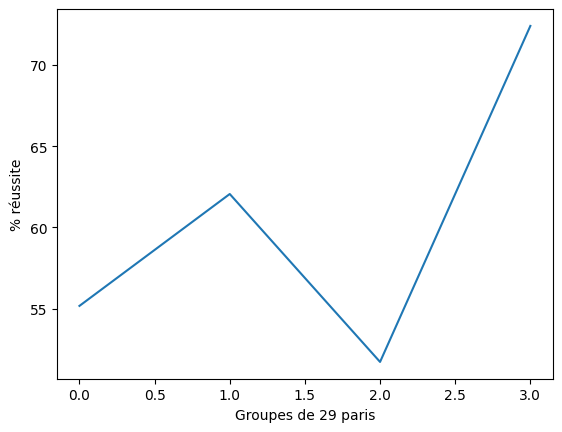

Note : 0.6


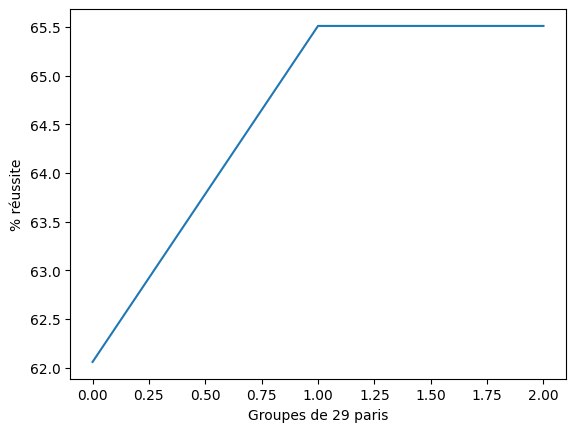

Note : 0.61


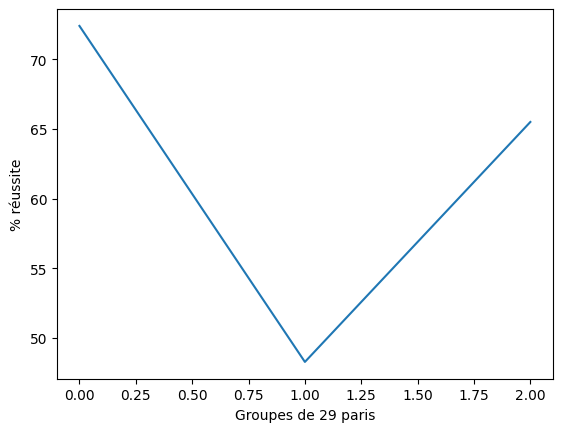

Note : 0.62


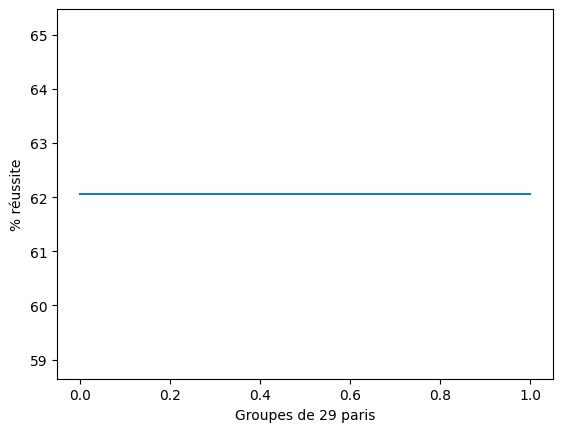

Note : 0.63


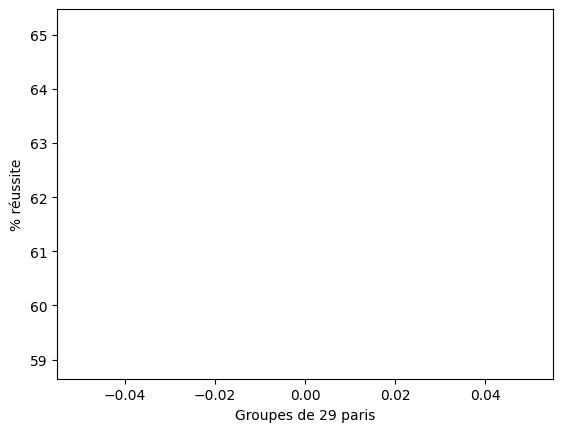

Note : 0.64


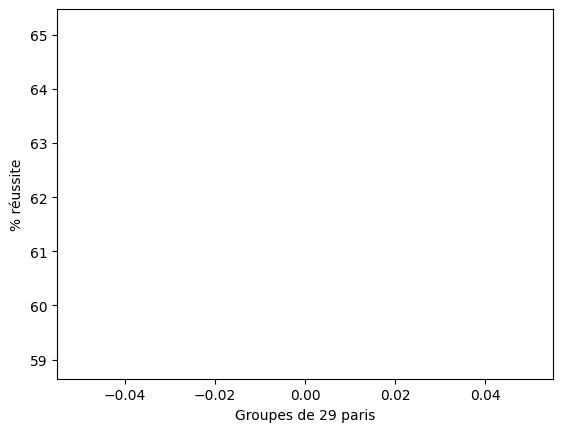

Note : 0.65


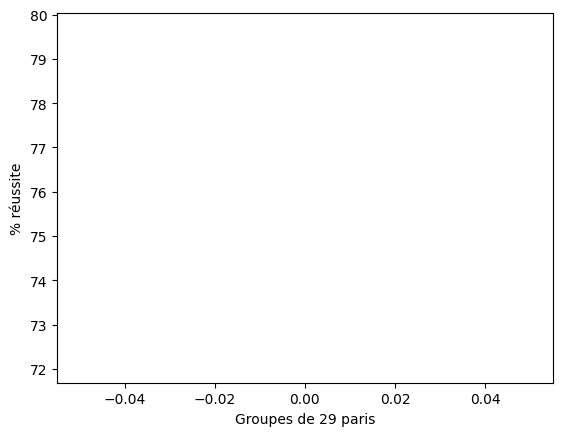

Note : 0.66


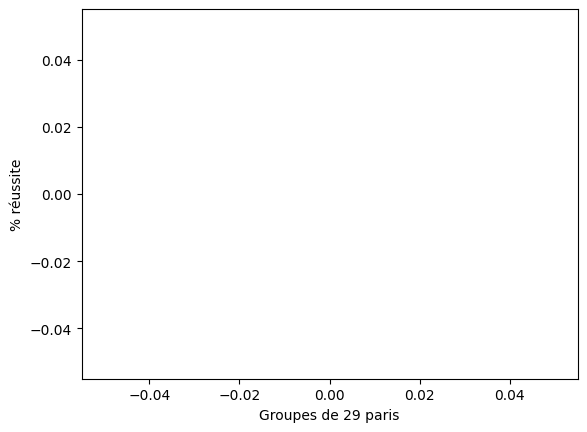

Note : 0.67


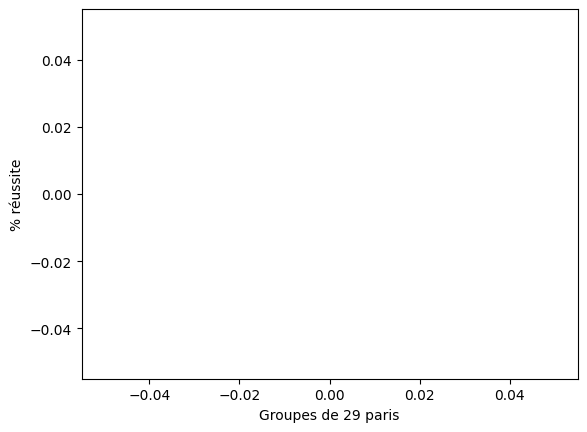

Note : 0.68


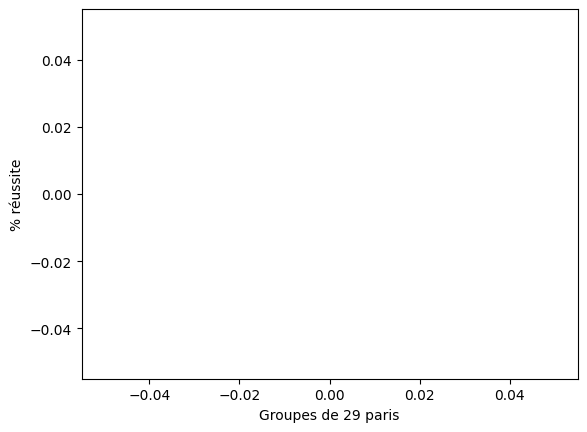

Note : 0.69


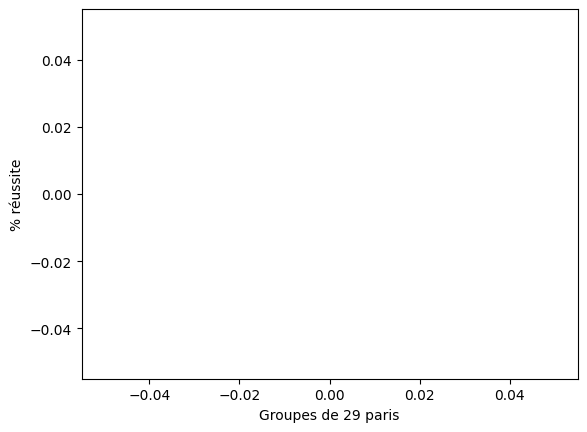

Note : 0.7


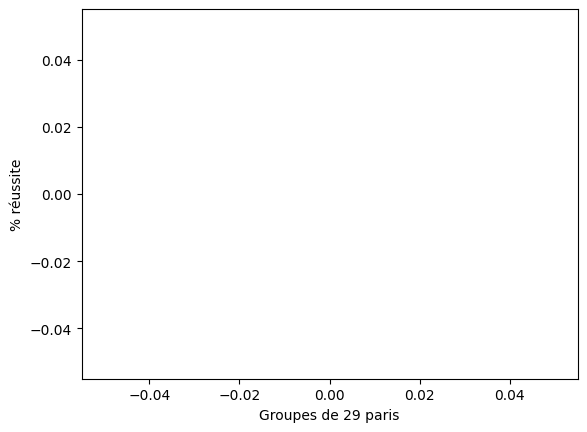

Note : 0.71


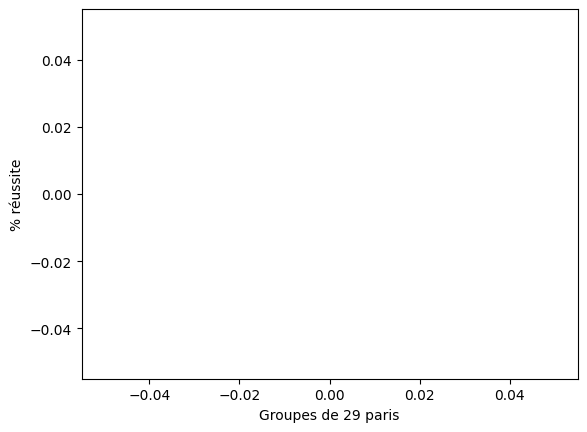

Note : 0.72


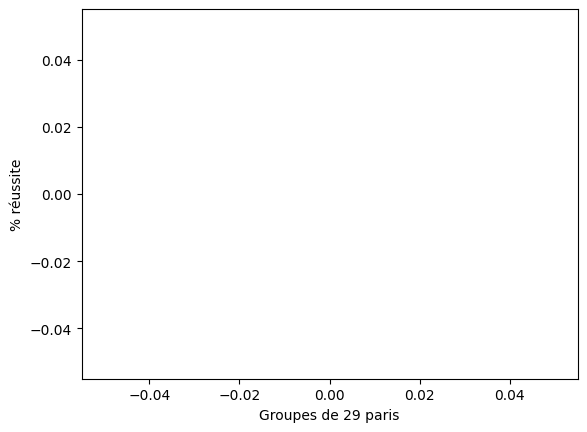

Note : 0.73


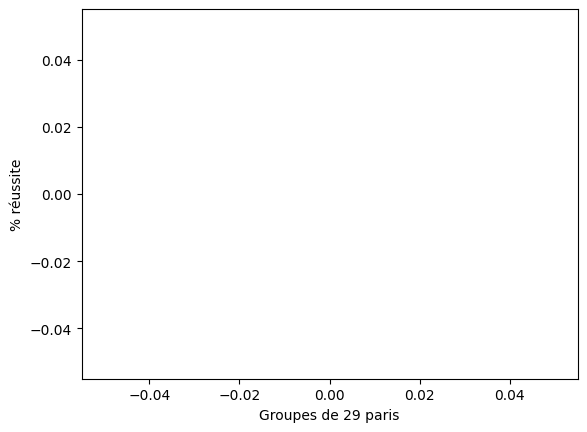

Note : 0.74


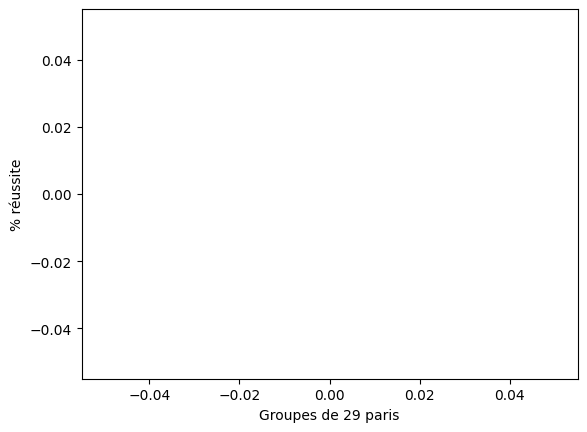

TypeError: 'NoneType' object is not subscriptable

In [12]:
print(len(data))
get_plots(data, lenMatchGroups)

PARIS

In [ ]:
""" arrayEquipes = get_equipes(dataframe, 0, 18, 'HomeTeam', 'AwayTeam')

print_array_equipes(arrayEquipes) """

" arrayEquipes = get_equipes(dataframe, 0, 18, 'HomeTeam', 'AwayTeam')\n\nprint_array_equipes(arrayEquipes) "

In [ ]:
""" add_match(dataframe, '16/02/2023', arrayEquipes[3], arrayEquipes[11])
add_match(dataframe, '16/02/2023', arrayEquipes[1], arrayEquipes[4])
add_match(dataframe, '16/02/2023', arrayEquipes[13], arrayEquipes[10])
add_match(dataframe, '16/02/2023', arrayEquipes[7], arrayEquipes[16])
add_match(dataframe, '16/02/2023', arrayEquipes[15], arrayEquipes[6])
add_match(dataframe, '16/02/2023', arrayEquipes[9], arrayEquipes[0])
add_match(dataframe, '16/02/2023', arrayEquipes[5], arrayEquipes[12])
add_match(dataframe, '16/02/2023', arrayEquipes[2], arrayEquipes[8])
add_match(dataframe, '16/02/2023', arrayEquipes[17], arrayEquipes[14]) """

" add_match(dataframe, '16/02/2023', arrayEquipes[3], arrayEquipes[11])\nadd_match(dataframe, '16/02/2023', arrayEquipes[1], arrayEquipes[4])\nadd_match(dataframe, '16/02/2023', arrayEquipes[13], arrayEquipes[10])\nadd_match(dataframe, '16/02/2023', arrayEquipes[7], arrayEquipes[16])\nadd_match(dataframe, '16/02/2023', arrayEquipes[15], arrayEquipes[6])\nadd_match(dataframe, '16/02/2023', arrayEquipes[9], arrayEquipes[0])\nadd_match(dataframe, '16/02/2023', arrayEquipes[5], arrayEquipes[12])\nadd_match(dataframe, '16/02/2023', arrayEquipes[2], arrayEquipes[8])\nadd_match(dataframe, '16/02/2023', arrayEquipes[17], arrayEquipes[14]) "

In [ ]:
print(f"{dataframe.tail(100).to_string()}\n")

            Date          HomeTeam          AwayTeam  FTHG  FTAG  HA_Scored      Note
4002  23/10/2022          Volendam        Heerenveen     1     3          1   0.25009
4003  29/10/2022        Heerenveen           Utrecht     1     2          1  0.375194
4004  29/10/2022  Sparta Rotterdam       For Sittard     3     1          1  0.391427
4005  29/10/2022   Go Ahead Eagles         Excelsior     3     1          1  0.371768
4006  30/10/2022          FC Emmen         Groningen     0     0          0  0.420951
4007  30/10/2022     PSV Eindhoven          Nijmegen     3     0          0  0.434339
4008  30/10/2022            Twente          Waalwijk     3     0          0  0.297053
4009  30/10/2022        AZ Alkmaar          Volendam     2     1          1  0.526112
4010  04/11/2022           Cambuur          Nijmegen     0     1          0  0.170672
4011  05/11/2022           Vitesse  Sparta Rotterdam     0     4          0  0.432427
4012  05/11/2022       For Sittard          FC Emmen  

In [ ]:
""" 
afficher_note_match(dataframe, arrayEquipes[3], arrayEquipes[11], 0, 'HomeTeam', 'AwayTeam', 'HA_Scored', 'Date')
afficher_note_match(dataframe, arrayEquipes[1], arrayEquipes[4], 0, 'HomeTeam', 'AwayTeam', 'HA_Scored', 'Date')
afficher_note_match(dataframe, arrayEquipes[13], arrayEquipes[10], 0, 'HomeTeam', 'AwayTeam', 'HA_Scored', 'Date')
afficher_note_match(dataframe, arrayEquipes[7], arrayEquipes[16], 0, 'HomeTeam', 'AwayTeam', 'HA_Scored', 'Date')
afficher_note_match(dataframe, arrayEquipes[15], arrayEquipes[6], 0, 'HomeTeam', 'AwayTeam', 'HA_Scored', 'Date')
afficher_note_match(dataframe, arrayEquipes[9], arrayEquipes[0], 0, 'HomeTeam', 'AwayTeam', 'HA_Scored', 'Date')
afficher_note_match(dataframe, arrayEquipes[5], arrayEquipes[12], 0, 'HomeTeam', 'AwayTeam', 'HA_Scored', 'Date')
afficher_note_match(dataframe, arrayEquipes[2], arrayEquipes[8], 0, 'HomeTeam', 'AwayTeam', 'HA_Scored', 'Date')
afficher_note_match(dataframe, arrayEquipes[17], arrayEquipes[14], 0, 'HomeTeam', 'AwayTeam', 'HA_Scored', 'Date')
"""

" \nafficher_note_match(dataframe, arrayEquipes[3], arrayEquipes[11], 0, 'HomeTeam', 'AwayTeam', 'HA_Scored', 'Date')\nafficher_note_match(dataframe, arrayEquipes[1], arrayEquipes[4], 0, 'HomeTeam', 'AwayTeam', 'HA_Scored', 'Date')\nafficher_note_match(dataframe, arrayEquipes[13], arrayEquipes[10], 0, 'HomeTeam', 'AwayTeam', 'HA_Scored', 'Date')\nafficher_note_match(dataframe, arrayEquipes[7], arrayEquipes[16], 0, 'HomeTeam', 'AwayTeam', 'HA_Scored', 'Date')\nafficher_note_match(dataframe, arrayEquipes[15], arrayEquipes[6], 0, 'HomeTeam', 'AwayTeam', 'HA_Scored', 'Date')\nafficher_note_match(dataframe, arrayEquipes[9], arrayEquipes[0], 0, 'HomeTeam', 'AwayTeam', 'HA_Scored', 'Date')\nafficher_note_match(dataframe, arrayEquipes[5], arrayEquipes[12], 0, 'HomeTeam', 'AwayTeam', 'HA_Scored', 'Date')\nafficher_note_match(dataframe, arrayEquipes[2], arrayEquipes[8], 0, 'HomeTeam', 'AwayTeam', 'HA_Scored', 'Date')\nafficher_note_match(dataframe, arrayEquipes[17], arrayEquipes[14], 0, 'HomeTea

In [ ]:
print(calcul_somme(200, 0.42))

84.0
